In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii

In [4]:
fire_mw_mass = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/external/mw_chen_gnedin_2024.txt"

with open(fire_mw_mass) as f:
    content = f.readlines()
    # content = content[:]

dat = ascii.read(content)

In [5]:
fire = dat[(dat["col1"] == 25236877) & (dat["col3"] == -1)]

In [6]:
log_mass = fire["col6"]

In [7]:
mw_mass = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/external/mw_cluster_mass.txt"

data = pd.read_fwf(mw_mass)

mw_mass = data["Mass"][2:]
log_mw_mass = [np.log10(float(mass)) for mass in np.array(mw_mass)]

In [15]:
data_dir = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/result/m12i"
pro_dir = data_dir + "/processed/"

it = 0
r, s, a = 1, 2, 2
save_file = pro_dir + "pro_it%d_r%d_s%d_a%d.hdf5" % (it, r, s, a)
pro_df = pd.read_hdf(save_file, "df")
fil_df = pro_df[pro_df["survive_flag"] == 1]

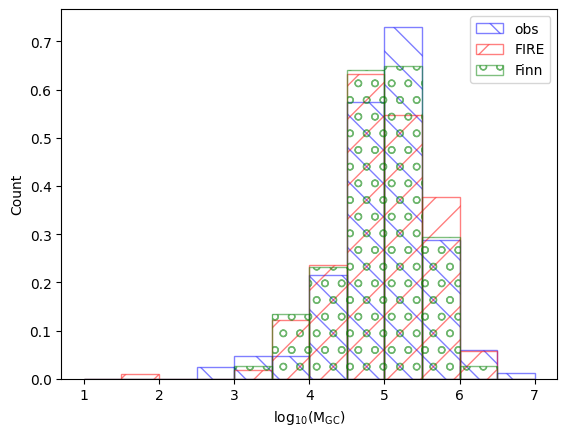

In [19]:
bins = np.linspace(1, 7, 13)
plt.hist(
    log_mw_mass, bins=bins, fill=False, edgecolor="blue", hatch="\\", alpha=0.5, density=True, label="obs"
)
plt.hist(log_mass, bins=bins, fill=False, edgecolor="red", hatch="/", alpha=0.5, density=True, label="FIRE")
plt.hist(
    fil_df["logM(z=0)"],
    bins=bins,
    fill=False,
    edgecolor="green",
    hatch="o",
    alpha=0.5,
    density=True,
    label="Finn",
)
plt.xlabel(r"log$_{10}($M$_{\rm GC})$")
plt.ylabel("Count")
plt.legend()

In [ ]:
len(fire)